# Exploratory Data Analysis (EDA) and Preprocessing
## Dataset: Prosper Loan Data

This notebook presents the initial phase of the Credit Risk Audit project.  
We perform an exploratory analysis and data preprocessing with the following goals:

- **Objective**: Prepare the data for building credit default prediction models and subsequent auditing.
- **Target variable**: We will focus on predicting the loan status, identifying defaults or delinquency risk.
- **Planned models**: Logistic Regression, Random Forest, and Gradient Boosting (XGBoost).
- **Downstream auditing**: Once the models are trained, we will audit their behavior using explainability (SHAP, LIME) and robustness techniques (adversarial perturbations).

The exploratory analysis aims to:

- Understand the structure and quality of the data.
- Handle missing values systematically.
- Detect and evaluate outliers.
- Identify variables that are not useful or could cause information leakage (e.g., post-loan variables).
- Prepare a clean and reliable dataset for modeling.

---

The dataset consists of 113,937 loans and 81 variables, including borrower characteristics, loan information, credit attributes, and historical payment performance.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
## 1. Imports and Setup
import sys
import os

# Add the project root to the Python path
sys.path.append(os.path.abspath('..'))

import pandas as pd
import numpy as np
from audit_tool import preprocessing as pp

# Settings
pd.set_option('display.max_columns', None)

In [3]:
## Load the preprocessed Prosper Loan dataset

file_path = '../data/raw/prosper_loan_data.csv'

df = pp.load_data(file_path)

print(f"Dataset loaded successfully with shape: {df.shape}")

Dataset loaded successfully with shape: (113937, 81)


## 1. Dataset Overview

Let's review the structure and basic statistics of the dataset.

### Dataset Dictionary
| Variable | Description |
|:---|:---|
| ListingKey | Unique key for each listing. |
| ListingNumber | Public unique number identifying the listing. |
| ListingCreationDate | Date when the listing was created. |
| CreditGrade | Credit rating at listing (pre-2009 listings). |
| Term | Length of the loan in months. |
| LoanStatus | Current status of the loan. |
| ClosedDate | Date the loan was closed (if applicable). |
| BorrowerAPR | Borrower's Annual Percentage Rate. |
| BorrowerRate | Borrower's interest rate. |
| LenderYield | Lender's yield on the loan after service fee. |
| EstimatedEffectiveYield | Effective yield estimation (after late fees and defaults). |
| EstimatedLoss | Estimated principal loss on defaults. |
| EstimatedReturn | Estimated return (Effective Yield - Loss Rate). |
| ProsperRating (numeric) | Numeric Prosper Rating at origination. |
| ProsperRating (Alpha) | Alphabetic Prosper Rating at origination. |
| ProsperScore | Custom risk score (1-10) based on Prosper data. |
| ListingCategory | Purpose selected for the loan. |
| BorrowerState | Borrower's state abbreviation. |
| Occupation | Borrower's stated occupation. |
| EmploymentStatus | Borrower's employment status. |
| EmploymentStatusDuration | Length of current employment status (months). |
| IsBorrowerHomeowner | Whether the borrower owns a home. |
| CurrentlyInGroup | Whether the borrower was in a group. |
| GroupKey | Key of the group borrower belongs to (if any). |
| DateCreditPulled | Date when the credit report was pulled. |
| CreditScoreRangeLower | Lower bound of borrower's credit score. |
| CreditScoreRangeUpper | Upper bound of borrower's credit score. |
| FirstRecordedCreditLine | Date of first recorded credit line. |
| CurrentCreditLines | Number of active credit lines. |
| OpenCreditLines | Number of open credit lines. |
| TotalCreditLinespast7years | Total credit lines opened in the last 7 years. |
| OpenRevolvingAccounts | Number of open revolving accounts. |
| OpenRevolvingMonthlyPayment | Monthly payment for revolving accounts. |
| InquiriesLast6Months | Number of credit inquiries in the last 6 months. |
| TotalInquiries | Total number of inquiries. |
| CurrentDelinquencies | Current number of delinquent accounts. |
| AmountDelinquent | Total dollars delinquent. |
| DelinquenciesLast7Years | Number of delinquencies over the last 7 years. |
| PublicRecordsLast10Years | Number of public records in the last 10 years. |
| PublicRecordsLast12Months | Number of public records in the last 12 months. |
| RevolvingCreditBalance | Total balance on revolving credit accounts. |
| BankcardUtilization | Utilization percentage of bankcard credit. |
| AvailableBankcardCredit | Available credit on bankcards. |
| TotalTrades | Total number of trade lines opened. |
| TradesNeverDelinquent | Number of trades with no delinquencies. |
| TradesOpenedLast6Months | Number of trades opened in the last 6 months. |
| DebtToIncomeRatio | Debt-to-income ratio (capped at 10.01). |
| IncomeRange | Income range category. |
| IncomeVerifiable | Whether borrower can verify income. |
| StatedMonthlyIncome | Monthly income stated by the borrower. |
| LoanKey | Unique key associated with the loan. |
| TotalProsperLoans | Number of Prosper loans the borrower has. |
| TotalProsperPaymentsBilled | Number of payments billed on Prosper loans. |
| OnTimeProsperPayments | Number of on-time payments on Prosper loans. |
| ProsperPaymentsLessThanOneMonthLate | Payments less than one month late. |
| ProsperPaymentsOneMonthPlusLate | Payments more than one month late. |
| ProsperPrincipalBorrowed | Principal amount borrowed on Prosper loans. |
| ProsperPrincipalOutstanding | Principal amount outstanding on Prosper loans. |
| ScorexChangeAtTimeOfListing | Change in credit score compared to prior Prosper loan. |
| LoanCurrentDaysDelinquent | Number of days loan is delinquent. |
| LoanFirstDefaultedCycleNumber | Loan cycle at which default occurred. |
| LoanMonthsSinceOrigination | Months since loan origination. |
| LoanNumber | Unique loan ID. |
| LoanOriginalAmount | Amount originally borrowed. |
| LoanOriginationDate | Date the loan was originated. |
| LoanOriginationQuarter | Quarter of loan origination. |
| MemberKey | Unique borrower key. |
| MonthlyLoanPayment | Scheduled monthly payment amount. |
| LP_CustomerPayments | Cumulative gross payments pre-charge-off. |
| LP_CustomerPrincipalPayments | Cumulative principal payments pre-charge-off. |
| LP_InterestandFees | Cumulative interest and fees paid pre-charge-off. |
| LP_ServiceFees | Service fees paid by investors. |
| LP_CollectionFees | Collection fees paid by investors. |
| LP_GrossPrincipalLoss | Gross principal charged-off amount. |
| LP_NetPrincipalLoss | Net uncollected principal after recoveries. |
| LP_NonPrincipalRecoverypayments | Recovery payments for fees and interest. |
| PercentFunded | Percentage of loan funded. |
| Recommendations | Number of borrower recommendations. |
| InvestmentFromFriendsCount | Number of friends who invested. |
| InvestmentFromFriendsAmount | Amount invested by friends. |
| Investors | Number of investors who funded the loan. |

In [4]:
## Quick overview: structure, types, basic statistics
pp.overview_data(df)


Data Overview
----------------------------------------
Shape: (113937, 81)

Dataset Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield    

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

### Defining the TARGET variable

The `LoanStatus` column includes multiple statuses reflecting the repayment state of the loans. To create a binary classification target (`default` vs `no default`), we will consider:

- **Default (1):** Loans with status "Chargedoff" or "Defaulted".
- **No default (0):** All other statuses, including "Current", "Completed", and various levels of past due.

In [5]:
df['LoanStatus'].value_counts()

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

In [6]:
# Define binary target based on LoanStatus
default_statuses = ['Chargedoff', 'Defaulted']
df['TARGET'] = df['LoanStatus'].apply(lambda x: 1 if x in default_statuses else 0)

**TARGET variable distribution**

Let's explore target's distribution to understand the class balance. This is crucial for later modeling steps, as imbalanced classes may require resampling techniques or adjusted evaluation metrics.

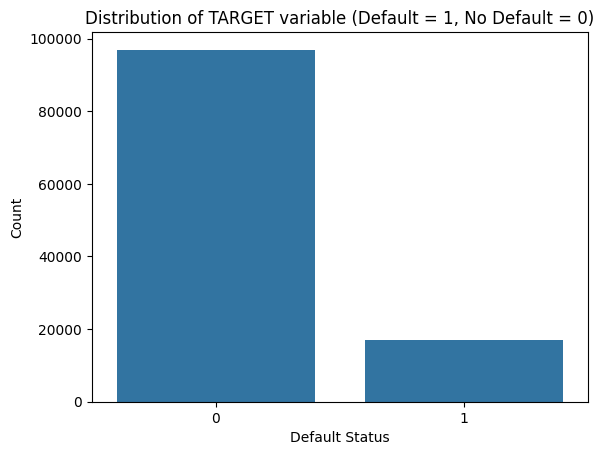

Percentage of defaults in the dataset: 14.93%


In [37]:
# Check target distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TARGET', data=df)
plt.title('Distribution of TARGET variable (Default = 1, No Default = 0)')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

# Print percentage of defaults
default_percentage = df['TARGET'].mean() * 100
print(f"Percentage of defaults in the dataset: {default_percentage:.2f}%")

### Removal of Post-Loan Variables

In this analysis, we aim to predict credit default based solely on information available at the time of loan application. Therefore, it is crucial to remove features that reflect post-loan performance, as they would leak future information into the model.

Specifically, we remove all variables starting with **LP_**, which relate to payments, losses, fees, and recovery actions after the loan has been issued:

- `LP_CustomerPayments`
- `LP_CustomerPrincipalPayments`
- `LP_InterestandFees`
- `LP_ServiceFees`
- `LP_CollectionFees`
- `LP_GrossPrincipalLoss`
- `LP_NetPrincipalLoss`
- `LP_NonPrincipalRecoverypayments`

Keeping these features would result in unrealistic predictive performance and data leakage, making the model unviable for real-world applications.

In [7]:
# Drop post-loan variables (starting with 'LP_') to prevent data leakage

lp_columns = [col for col in df.columns if col.startswith('LP_')]

print(f"Dropping the following LP-related columns ({len(lp_columns)} total):")
print(lp_columns)

# Drop them from the dataset
df.drop(columns=lp_columns, inplace=True)

Dropping the following LP-related columns (8 total):
['LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments']


### Removal of Model-Based Risk Scores

To ensure fairness and transparency, we must exclude features derived from internal credit scoring models. Including these would bias our model toward Prosper’s proprietary assessments and invalidate independent model auditing.

The following variables are removed:

- `CreditGrade`
- `ProsperRating (numeric)`
- `ProsperRating (Alpha)`
- `ProsperScore`
- `EstimatedEffectiveYield`
- `EstimatedLoss`
- `EstimatedReturn`
- `ScorexChangeAtTimeOfListing`

These features embed knowledge from internal scoring systems and should not be used in an external model evaluation.


In [8]:
model_based_vars = [
    'CreditGrade', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
    'ProsperScore', 'EstimatedEffectiveYield', 'EstimatedLoss',
    'EstimatedReturn', 'ScorexChangeAtTimeOfListing',
]

df = df.drop(columns=[col for col in model_based_vars if col in df.columns], errors='ignore')

### Removal of Unique Identifiers and Keys

Identifiers such as listing numbers or member keys have no predictive value and can introduce data leakage if correlated with other records or time-based patterns.

Removed identifiers:

- `ListingKey`
- `ListingNumber`
- `LoanKey`
- `LoanNumber`
- `MemberKey`
- `GroupKey`

These are dropped to ensure a clean and generalizable model.


In [9]:
identifier_vars = [
    'ListingKey', 'ListingNumber', 'LoanKey',
    'LoanNumber', 'MemberKey', 'GroupKey',
]

df = df.drop(columns=[col for col in identifier_vars if col in df.columns], errors='ignore')

### Removal of Delinquency and Loan Performance Variables

Variables such as delinquencies, missed payments, or remaining principal are only observable after the loan is granted. Including them would leak future behavior into the training set.

Removed variables:

- `LoanStatus`
- `ClosedDate`
- `LoanCurrentDaysDelinquent`
- `LoanFirstDefaultedCycleNumber`
- `LoanMonthsSinceOrigination`
- `ProsperPaymentsLessThanOneMonthLate`
- `ProsperPaymentsOneMonthPlusLate`
- `OnTimeProsperPayments`
- `TotalProsperPaymentsBilled`
- `ProsperPrincipalBorrowed`
- `ProsperPrincipalOutstanding`

All of these refer to events that occur after the loan has been issued.


In [10]:
loan_performance_vars = [
    'LoanStatus', 'ClosedDate', 'LoanCurrentDaysDelinquent',
    'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
    'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate',
    'OnTimeProsperPayments', 'TotalProsperPaymentsBilled',
    'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
]

df = df.drop(columns=[col for col in loan_performance_vars if col in df.columns], errors='ignore')

### Removal of Social and Investor Behavior Features

Variables related to how many people funded a loan or how much friends invested reflect external investor behavior and should not influence the creditworthiness model.

Removed features:

- `Recommendations`
- `InvestmentFromFriendsCount`
- `InvestmentFromFriendsAmount`
- `Investors`

These variables reflect peer or platform decisions after the listing was made public and are not part of the borrower’s own profile.


In [11]:
social_vars = [
    'Recommendations', 'InvestmentFromFriendsCount',
    'InvestmentFromFriendsAmount', 'Investors',
]

df = df.drop(columns=[col for col in social_vars if col in df.columns], errors='ignore')

### Removal of Temporal Features

Some features such as loan origination date or quarter can be helpful for temporal analysis, such as detecting concept drift or analyzing default rates over time. However, they should not be included as predictors in the model.

Temporarily excluded from modeling:

- `LoanOriginationDate`
- `LoanOriginationQuarter`

These variables are preserved in a separate copy for time-based exploratory analysis.


In [12]:
# Save temporal features for later use
temporal_vars = ['LoanOriginationDate', 'LoanOriginationQuarter']
df_temporal = df[temporal_vars].copy()

# Remove from main modeling dataset
df = df.drop(columns=[col for col in temporal_vars if col in df.columns], errors='ignore')

In [13]:
# Show variables with more than 100,000 unique values
high_cardinality_vars = df.nunique().sort_values(ascending=False)
high_cardinality_vars = high_cardinality_vars[high_cardinality_vars > 50_000]

print("Variables with >50,000 unique values:")
display(high_cardinality_vars)


Variables with >50,000 unique values:


ListingCreationDate    113064
DateCreditPulled       112992
dtype: int64

In [14]:
df.shape

(113937, 43)

## 2. Missing Value Analysis

We analyze missing values to decide whether to impute or drop columns based on the percentage of missingness.

In [15]:
## Analyze missing values (show columns with missing data)

missing_values = pp.check_missing_values(df)

print("\nMissing Values Overview:")
display(missing_values)


Missing Values Overview:


,Missing Values,Percentage
TotalProsperLoans,91852,80.616481
DebtToIncomeRatio,8554,7.507658
EmploymentStatusDuration,7625,6.692295
AmountDelinquent,7622,6.689662
CurrentCreditLines,7604,6.673864
BankcardUtilization,7604,6.673864
PublicRecordsLast12Months,7604,6.673864
OpenCreditLines,7604,6.673864
RevolvingCreditBalance,7604,6.673864
AvailableBankcardCredit,7544,6.621203


We define a threshold of 50% missing values to remove variables from the dataset. Features with more than 50% missing values are unlikely to provide reliable information and are excluded:

- `TotalProsperLoans` (80.6%)

All remaining features with lower missing rates will be imputed using appropriate strategies (median for numerical, constant or mode for categorical).

In [16]:
# See only columns with >50% missing
high_missing = pp.check_missing_values(df, threshold=50)
display(high_missing)

,Missing Values,Percentage
TotalProsperLoans,91852,80.616481


In [17]:
# Identify columns with more than 50% missing values
high_missing_cols = high_missing[high_missing['Percentage'] > 50].index.tolist()

print(f"Dropping {len(high_missing_cols)} columns with high missingness (>50%).")
print("Columns being dropped:", high_missing_cols)

# Drop those columns
df.drop(columns=high_missing_cols, inplace=True)

Dropping 1 columns with high missingness (>50%).
Columns being dropped: ['TotalProsperLoans']


In [18]:
# Check remaining missing values
remaining_missing = pp.check_missing_values(df, threshold=0)
display(remaining_missing)

,Missing Values,Percentage
DebtToIncomeRatio,8554,7.507658
EmploymentStatusDuration,7625,6.692295
AmountDelinquent,7622,6.689662
CurrentCreditLines,7604,6.673864
PublicRecordsLast12Months,7604,6.673864
OpenCreditLines,7604,6.673864
RevolvingCreditBalance,7604,6.673864
BankcardUtilization,7604,6.673864
TotalTrades,7544,6.621203
TradesNeverDelinquent (percentage),7544,6.621203


### Handling remaining missing values

After removing columns with more than 50% missingness, several features still have missing values (under 8%).  
We will decide how to handle them based on the type of feature:
- For numerical variables: we will impute missing values with the median.
- For categorical variables: we will impute missing values with a new category ("Missing").
- For date variables** (e.g. `FirstRecordedCreditLine`): we will impute with the median year.

This ensures we preserve valuable information while preventing biases from arbitrary filling.


In [19]:
num_cols, cat_cols = pp.get_numerical_and_categorical_columns(df)

In [20]:
cat_cols

['ListingCreationDate',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'IncomeRange']

### Processing Date Columns

We convert the following string-based date columns into proper datetime objects:

- `ListingCreationDate`
- `DateCreditPulled`
- `FirstRecordedCreditLine`

From each, we extract both **year** and **month** to enable temporal analysis and potential seasonality effects. The raw datetime columns are then dropped to avoid high-cardinality noise in the model.


In [21]:
date_cols = ['ListingCreationDate', 'DateCreditPulled', 'FirstRecordedCreditLine']
df[date_cols] 

,ListingCreationDate,DateCreditPulled,FirstRecordedCreditLine
0,2007-08-26 19:09:29.263000000,2007-08-26 18:41:46.780000000,2001-10-11 00:00:00
1,2014-02-27 08:28:07.900000000,2014-02-27 08:28:14,1996-03-18 00:00:00
2,2007-01-05 15:00:47.090000000,2007-01-02 14:09:10.060000000,2002-07-27 00:00:00
3,2012-10-22 11:02:35.010000000,2012-10-22 11:02:32,1983-02-28 00:00:00
4,2013-09-14 18:38:39.097000000,2013-09-14 18:38:44,2004-02-20 00:00:00
...,...,...,...
113932,2013-04-14 05:55:02.663000000,2013-04-14 05:54:58,1997-09-01 00:00:00
113933,2011-11-03 20:42:55.333000000,2011-11-03 20:42:53,1992-01-17 00:00:00
113934,2013-12-13 05:49:12.703000000,2013-12-13 05:49:15,2002-02-25 00:00:00
113935,2011-11-14 13:18:26.597000000,2011-11-14 13:18:24,1993-12-01 00:00:00


In [22]:
# Ensure datetime conversion
date_cols = ['ListingCreationDate', 'DateCreditPulled', 'FirstRecordedCreditLine']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Extract year and month features
df['ListingYear'] = df['ListingCreationDate'].dt.year
df['ListingMonth'] = df['ListingCreationDate'].dt.month

df['FirstCreditYear'] = df['FirstRecordedCreditLine'].dt.year
df['FirstCreditMonth'] = df['FirstRecordedCreditLine'].dt.month

# Drop original date columns
df = df.drop(columns=date_cols, errors='ignore')


In [23]:
# Impute missing values (median for numerical, 'Missing' for categorical)
df = pp.impute_missing_values(
    df,
    num_method='median',
    cat_method='constant',
    cat_fill='Missing'
)


# Confirm no missing values left
missing_after = pp.check_missing_values(df)
display(missing_after)

if missing_after.empty:
    print("All missing values successfully handled!")
else:
    print("Warning: Some missing values remain.")

,Missing Values,Percentage


All missing values successfully handled!


## 3. Outlier Analysis

### Outlier Detection and Treatment

Outliers can heavily influence model performance and audit results.  
We will:
- Detect potential outliers using the Interquartile Range (IQR) method.
- Treat outliers by capping extreme values to the IQR bounds, preserving dataset size.

In [24]:
# Detect outliers
outlier_percentages = pp.calculate_outlier_percentage(df)
display(pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier Percentage']))

,Outlier Percentage
PublicRecordsLast10Years,24.080852
Term,22.959179
CurrentDelinquencies,20.623678
DelinquenciesLast7Years,16.344998
ListingCategory (numeric),16.078184
TARGET,14.929303
AmountDelinquent,14.479054
AvailableBankcardCredit,10.049413
RevolvingCreditBalance,9.131362
CreditScoreRangeLower,6.894161


In [25]:
# Treat most affected columns
top_outlier_cols = list(outlier_percentages.keys())[:12]
top_outlier_cols


['PublicRecordsLast10Years',
 'Term',
 'CurrentDelinquencies',
 'DelinquenciesLast7Years',
 'ListingCategory (numeric)',
 'TARGET',
 'AmountDelinquent',
 'AvailableBankcardCredit',
 'RevolvingCreditBalance',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'TradesOpenedLast6Months']

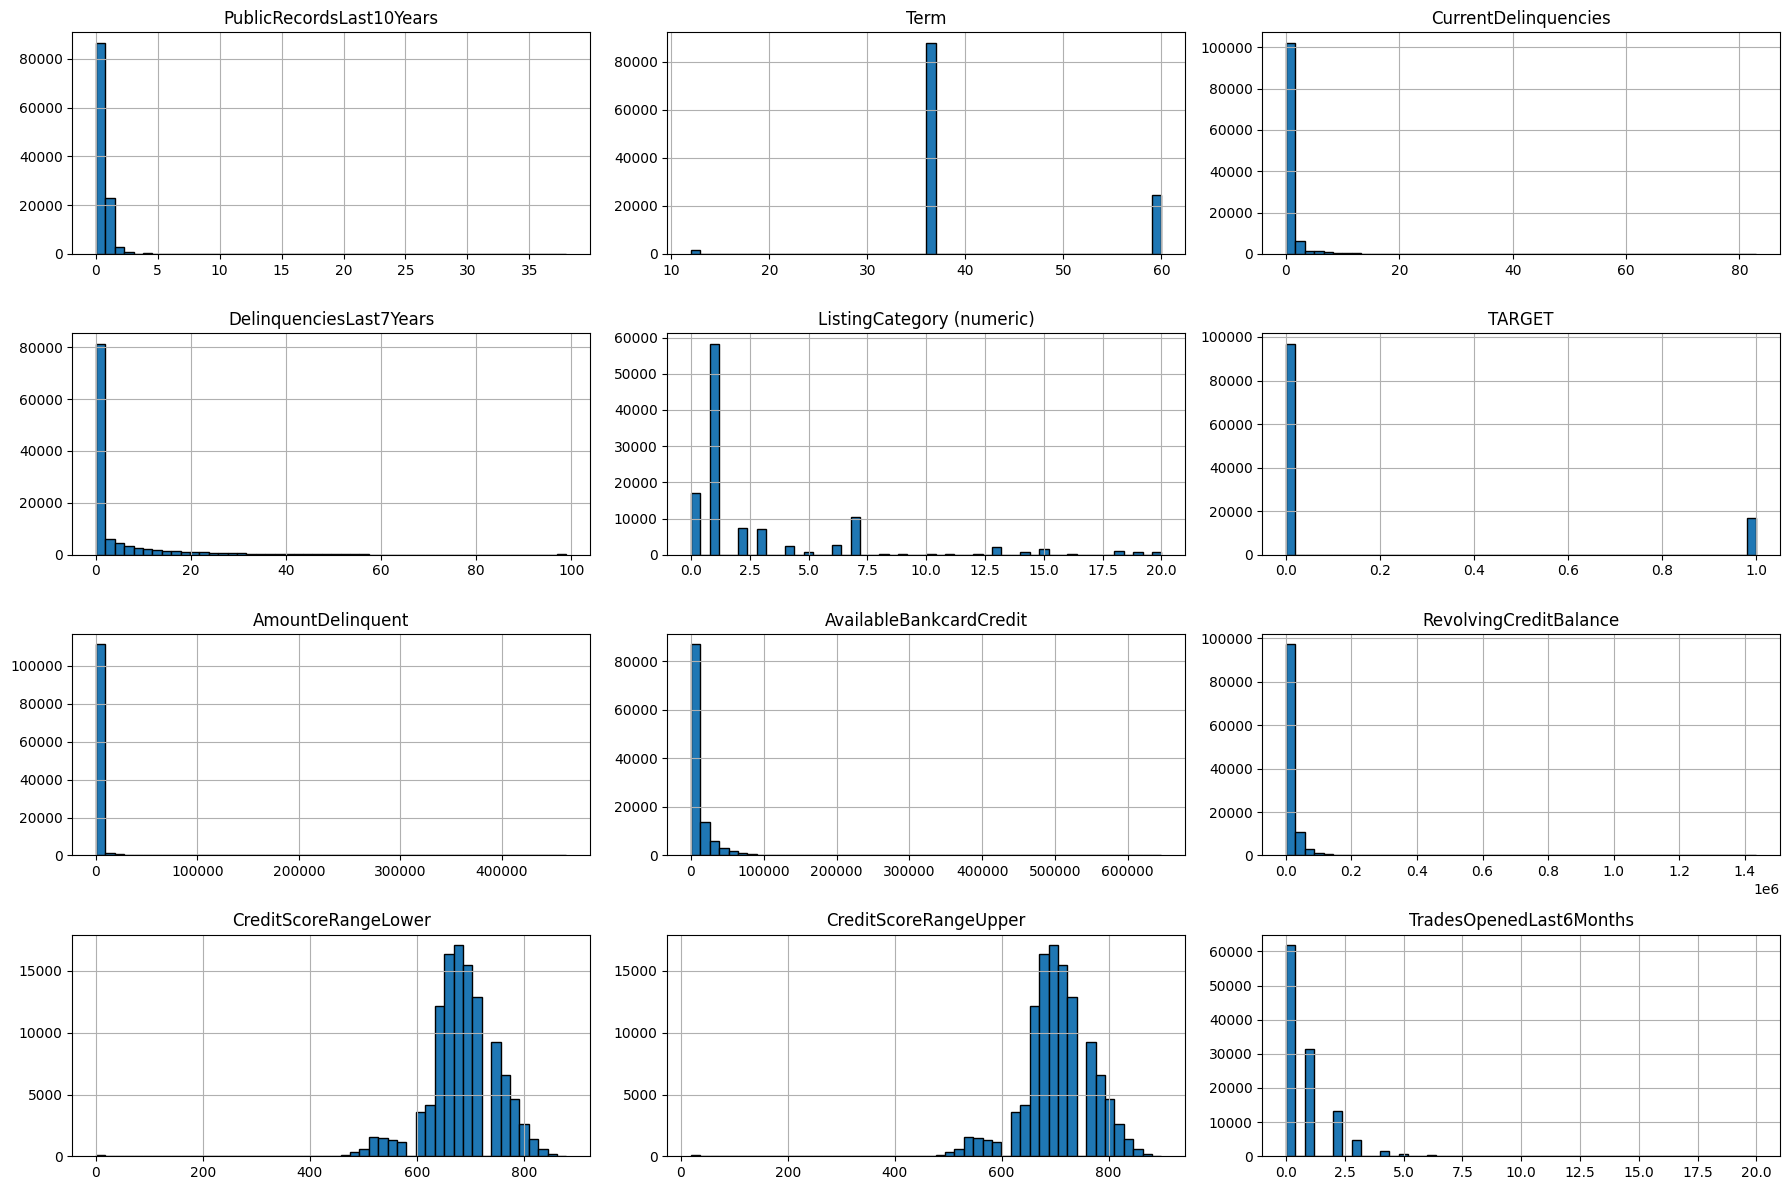

In [26]:
pp.plot_multiple_distributions(df, top_outlier_cols, bins=50, n_cols=3, figsize=(18, 12))

### Outlier Treatment

After reviewing the three variables with the highest percentage of outliers, the following decisions were made based on their business meaning and statistical behavior:

| Variable | Description | Decision |
|----------|-------------|----------|
| `PublicRecordsLast10Years` | Number of negative public records (e.g., bankruptcies, judgments) in the last 10 years. | Keep the variable. Apply winsorization at the 99th percentile to cap extreme values that may distort the model but retain meaningful variability. |
| `Term` | Loan term in months. | No outlier treatment. The variable is inherently categorical (typically 36 or 60 months) and should be treated as such in future modeling steps. |
| `CurrentDelinquencies` | Number of accounts currently delinquent. | Apply winsorization at the 99.5th percentile or set a logical cap (e.g., 20-25) to reduce the influence of extreme values. |

This approach aims to balance retaining important variation in the data while reducing the influence of extreme outliers that could negatively impact model training.


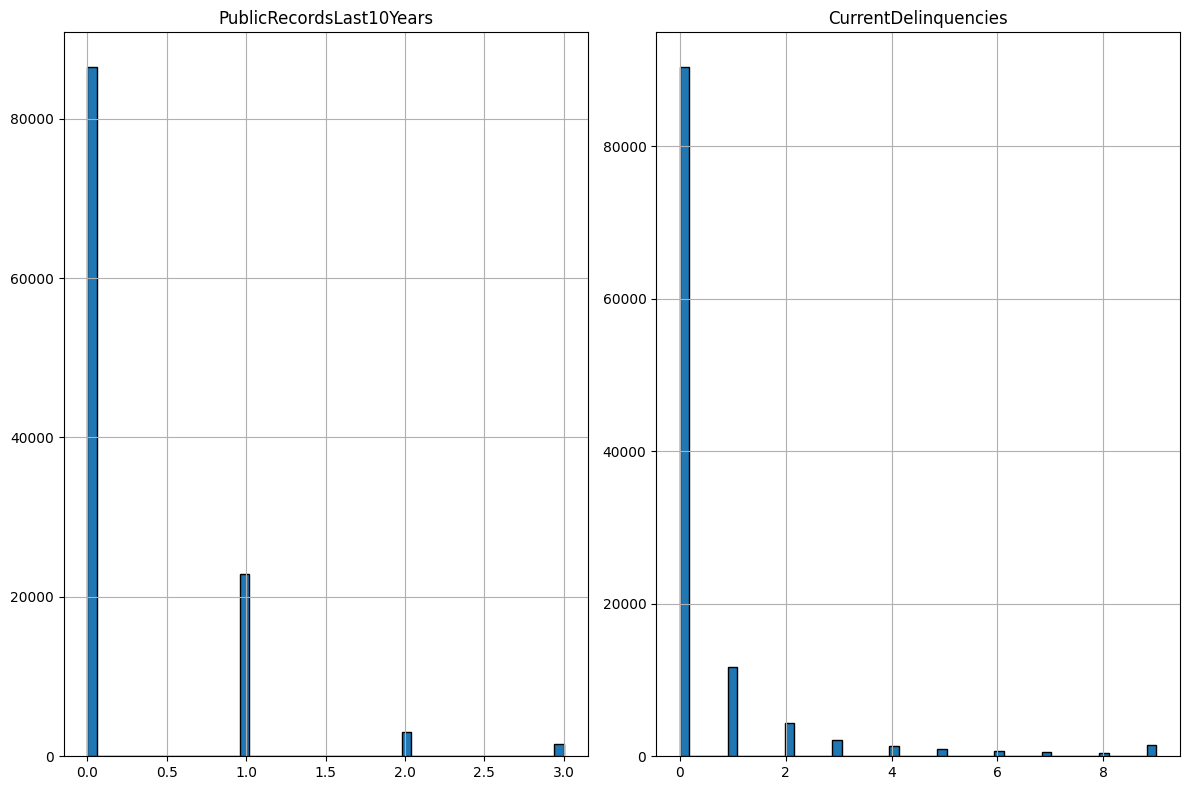

In [27]:
# Define columns and quantiles for winsorization
winsorization_plan = {
    "PublicRecordsLast10Years": (0.0, 0.99),
    "CurrentDelinquencies": (0.0, 0.995)  # Or set a logical cap
}

# Apply winsorization
df = pp.winsorize_columns(df, winsorization_plan)

# Check updated distributions
pp.plot_multiple_distributions(df, list(winsorization_plan.keys()), bins=50, n_cols=2, figsize=(12, 8))

After winsorization, the distributions of the treated variables show a significant reduction in extreme values while maintaining most of the data variability.

After analyzing the other variables with the highest number of outliers, we decided to apply winsorization to the following features:

- **DelinquenciesLast7Years**
- **AmountDelinquent**
- **AvailableBankcardCredit**
- **RevolvingCreditBalance**

These variables exhibited extreme values that could disproportionately influence the model training. Winsorization was applied at the 99th percentile, capping extreme values while preserving the general distribution of the data.

Categorical variables (e.g., ListingCategory) and features with reasonable distributions (e.g., CreditScoreRangeLower) were excluded from this treatment.

In [28]:
# Columns selected for winsorization
winsor_cols = ['DelinquenciesLast7Years',
               'AmountDelinquent',
               'AvailableBankcardCredit',
               'RevolvingCreditBalance']

# Apply winsorization (keeping top 1% capped)
df = pp.winsorize_columns(df, winsor_cols, limits=(0, 0.01))

# Check again the outliers if needed
outlier_percentages_post = pp.calculate_outlier_percentage(df)
display(pd.DataFrame.from_dict(outlier_percentages_post, orient='index', columns=['Outlier Percentage']))

/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/home/celia/Desktop/tfm-credit-risk-audit/venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the

,Outlier Percentage
PublicRecordsLast10Years,24.080852
Term,22.959179
CurrentDelinquencies,20.623678
DelinquenciesLast7Years,16.344998
ListingCategory (numeric),16.078184
TARGET,14.929303
AmountDelinquent,14.479054
AvailableBankcardCredit,10.049413
RevolvingCreditBalance,9.131362
CreditScoreRangeLower,6.894161


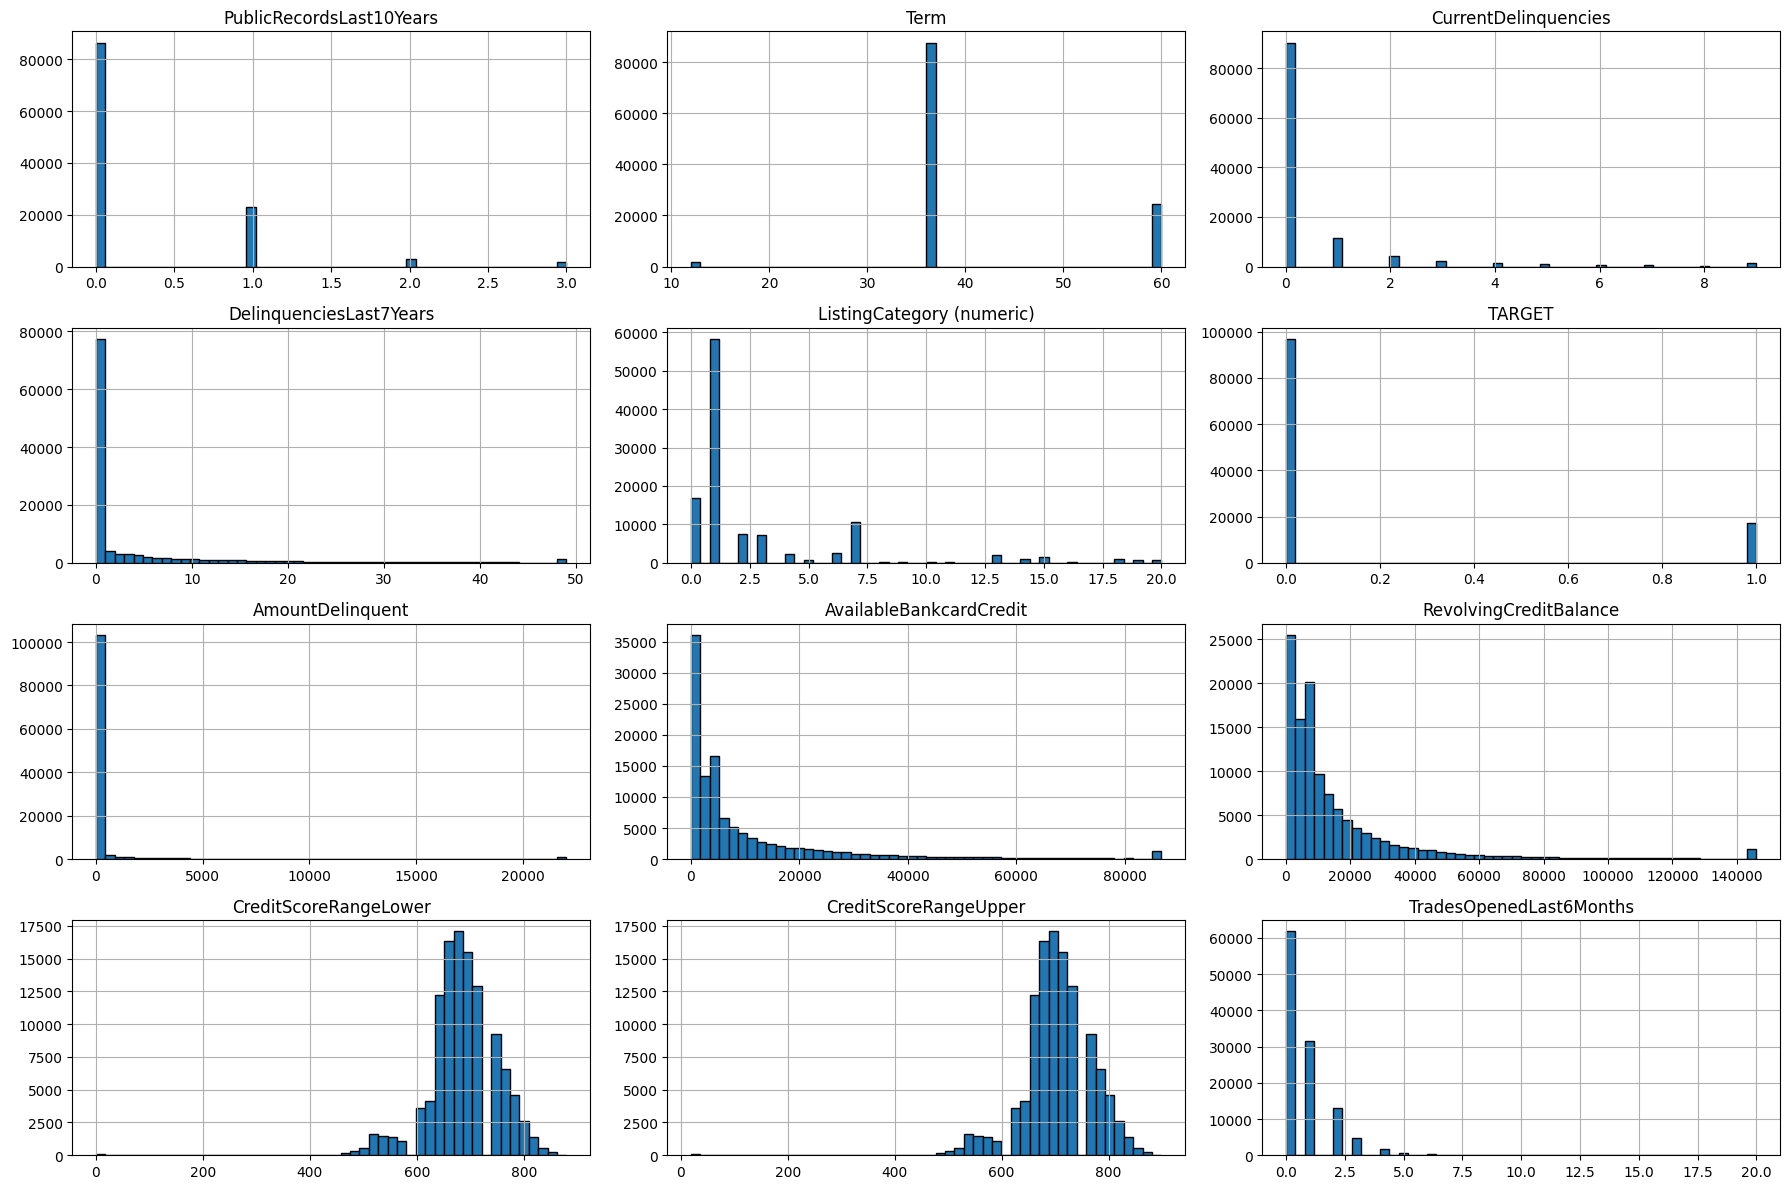

In [29]:
pp.plot_multiple_distributions(df, top_outlier_cols, bins=50, n_cols=3, figsize=(18, 12))



| Variable                  | Decision | Justification |
|---------------------------|----------|---------------|
| AvailableBankcardCredit   | Keep     | Right-skewed but expected for financial variables. Reflects available credit, important for risk assessment. |
| RevolvingCreditBalance    | Keep     | Skewness reflects typical borrower profiles. Provides crucial information on credit utilization. |
| CreditScoreRangeLower     | Keep     | Near-normal distribution. Essential predictor of borrower creditworthiness. |
| CreditScoreRangeUpper     | Keep     | Same as above. Retains important credit score information. |
| TradesOpenedLast6Months   | Keep     | Although skewed, it indicates recent borrower credit activity. Relevant for predicting financial behavior. |
| TotalInquiries            | Keep     | Captures borrower credit-seeking behavior. Outliers may be predictive of increased default risk. |


## 4. Categorical Variables Analysis and Preparation

We identify the following categorical variables, including numerical variables that should be treated categorically:

- `IncomeRange`: Ordered income brackets.
- `Term`: Loan duration in months (12, 36, 60).
- `ListingCategory (numeric)`: Loan purpose categories.
- `BorrowerState`: U.S. state of residence.
- `EmploymentStatus`: Employment status of the borrower.
- `Occupation`: Self-reported job title.

### Encoding Strategy

- **Ordinal Encoding**:
  - `IncomeRange`
  - `Term`

- **One-Hot Encoding**:
  - `ListingCategory (numeric)`
  - `BorrowerState`
  - `EmploymentStatus`

- **Target Encoding**:
  - `Occupation` (high-cardinality feature with predictive potential)

Before encoding, `Term` and `ListingCategory (numeric)` are explicitly cast as categorical variables.


In [30]:
# Get current categorical variables
num_cols, cat_cols = pp.get_numerical_and_categorical_columns(df)

print("Categorical columns identified:")
display(cat_cols)

Categorical columns identified:


['BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange']

Some numerical variables, despite being stored as numbers, represent categories or discrete groups. These will be recast as categorical variables for appropriate encoding.

In [31]:
# Numeric variables that should be treated as categorical
numeric_categoricals = ['ListingCategory (numeric)', 'Term']

# Convert them to category type
for col in numeric_categoricals:
    df[col] = df[col].astype('category')

print("Converted numeric variables to categorical:")
display(numeric_categoricals)

Converted numeric variables to categorical:


['ListingCategory (numeric)', 'Term']

In [32]:
ordinal_vars = ['IncomeRange', 'Term']
onehot_vars = ['ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus']
target_encode_vars = ['Occupation']  # high cardinality

In [33]:
df = pp.encode_mixed_categoricals(df, ordinal_vars, onehot_vars)
for col in target_encode_vars:
    means = df.groupby(col)['TARGET'].mean()
    df[col] = df[col].map(means)

In [34]:
# Check if all categoricals are encoded
_, cat_cols = pp.get_numerical_and_categorical_columns(df)
if not cat_cols:
    print("All categorical variables have been encoded. The dataset is now fully numeric.")
else:
    print(f"Remaining categorical variables: {cat_cols}")

All categorical variables have been encoded. The dataset is now fully numeric.


## 5. Feature Scaling

Since the dataset is now fully numeric, we apply standardization to all numerical features to ensure that they are on a comparable scale.

We use **StandardScaler**, which transforms each feature to have zero mean and unit variance. This is especially important for algorithms such as Lasso, Ridge, and PCA that are sensitive to feature magnitudes.

Note: Scaling is applied after encoding and imputation to ensure consistent treatment across all variables.


In [38]:
# Revisar estadísticas de las numéricas
num_cols, _ = pp.get_numerical_and_categorical_columns(df)

df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Term,113937.0,1.201260,0.434842,0.00000,1.000000,1.000000,1.000000,2.000000e+00
BorrowerAPR,113937.0,0.218826,0.080355,0.00653,0.156290,0.209760,0.283700,5.122900e-01
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.134000,0.184000,0.250000,4.975000e-01
LenderYield,113937.0,0.182701,0.074516,-0.01000,0.124200,0.173000,0.240000,4.925000e-01
Occupation,113937.0,0.149293,0.043122,0.00000,0.125550,0.154406,0.165636,4.375000e-01
EmploymentStatusDuration,113937.0,94.126026,91.553055,0.00000,28.000000,67.000000,130.000000,7.550000e+02
CreditScoreRangeLower,113937.0,685.538850,66.286893,0.00000,660.000000,680.000000,720.000000,8.800000e+02
CreditScoreRangeUpper,113937.0,704.538850,66.286893,19.00000,679.000000,699.000000,739.000000,8.990000e+02
CurrentCreditLines,113937.0,10.296023,5.273189,0.00000,7.000000,10.000000,13.000000,5.900000e+01
OpenCreditLines,113937.0,9.242801,4.852581,0.00000,6.000000,9.000000,12.000000,5.400000e+01


We applied standard scaling to all numerical features to ensure comparability and improve model performance. 
The target variable (`TARGET`) was excluded from scaling to preserve its binary classification nature (0 = non-default, 1 = default).

In [44]:
# Scale all numerical features, exclude TARGET from scaling
df_scaled = pp.scale_features(df, target_column='TARGET')

# Check that TARGET remains unchanged
print("Unique values in TARGET after scaling:", df_scaled['TARGET'].unique())


Unique values in TARGET after scaling: [0 1]


In [45]:
df_scaled[num_cols].agg(['mean', 'std'])

,Term,BorrowerAPR,BorrowerRate,LenderYield,Occupation,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,TARGET,ListingYear,ListingMonth,FirstCreditYear,FirstCreditMonth
mean,9.778483e-17,7.982435e-17,2.989671e-16,-1.334563e-17,2.438384e-16,1.521652e-17,2.606764e-16,2.606764e-16,2.762671e-17,-1.759877e-16,-2.354195e-17,2.606764e-17,3.280282e-17,-4.926659e-17,1.521652e-17,-2.163988e-17,1.247255e-19,4.646027e-18,1.184893e-17,1.193468e-17,3.405007e-17,-2.231340e-16,4.851824e-17,-9.872027e-17,2.049241e-15,2.594291e-17,-4.708389e-17,-7.234082e-18,9.167328e-17,-4.939132e-17,2.596162e-16,-7.516554e-15,0.149293,-4.390676e-14,-6.573036e-17,1.308368e-14,-4.237550e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.356379,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00


In [47]:
df_scaled.shape

(113937, 119)

## 6. Feature Selection with Lasso and Ridge

After encoding and scaling, the dataset contains 118 features. While some may be informative, others may be redundant or irrelevant.

We apply **Lasso** and **Ridge** regression for feature selection:

- **Lasso (L1 regularization)** shrinks coefficients and sets some to zero, effectively performing variable selection.
- **Ridge (L2 regularization)** shrinks coefficients but retains all variables, useful for evaluating relative importance.

Both models are trained using cross-validation to find the optimal regularization parameter (`alpha`).

The analysis is based on the standardized dataset, excluding the target variable `TARGET`.


Lasso selected 35 features out of 118


BorrowerRate                          0.406112
MonthlyLoanPayment                    0.039919
CurrentDelinquencies                  0.029959
TotalInquiries                        0.019450
Occupation                            0.018960
InquiriesLast6Months                  0.018590
TradesOpenedLast6Months               0.012227
OpenRevolvingMonthlyPayment           0.007822
RevolvingCreditBalance                0.005947
DebtToIncomeRatio                     0.005135
TotalCreditLinespast7years            0.003393
TradesNeverDelinquent (percentage)    0.002977
OpenCreditLines                       0.001910
AvailableBankcardCredit               0.001550
PublicRecordsLast10Years              0.001361
PublicRecordsLast12Months             0.000765
EmploymentStatusDuration              0.000253
FirstCreditMonth                     -0.001840
PercentFunded                        -0.003615
CurrentCreditLines                   -0.004193
Term                                 -0.005454
AmountDelinqu

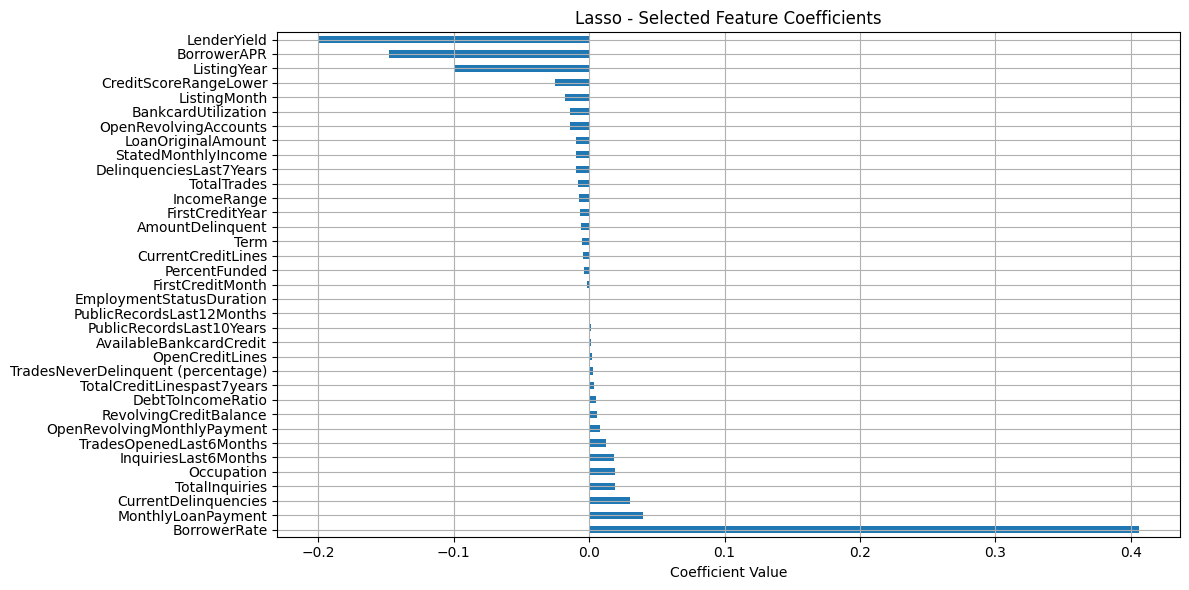

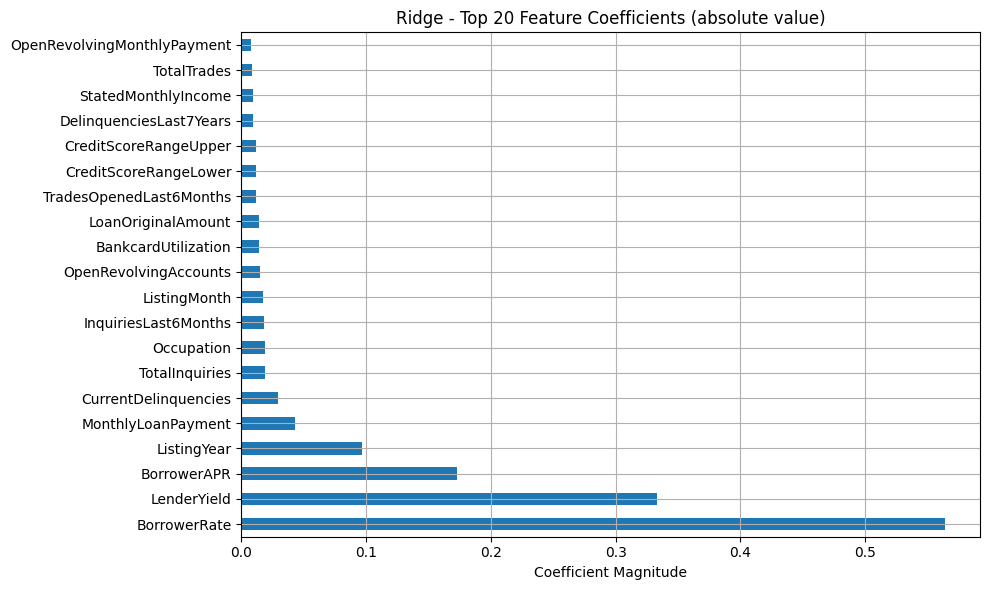

In [48]:
# Apply Lasso for feature selection
lasso_coefs = pp.lasso_ridge_feature_selection(df_scaled, target_column='TARGET', model_type='lasso')
lasso_selected = lasso_coefs[lasso_coefs != 0].sort_values(ascending=False)

print(f"Lasso selected {len(lasso_selected)} features out of {df_scaled.shape[1] - 1}")
display(lasso_selected)

# Apply Ridge for comparison
ridge_coefs = pp.lasso_ridge_feature_selection(df_scaled, target_column='TARGET', model_type='ridge')
ridge_sorted = ridge_coefs.abs().sort_values(ascending=False).head(20)

# Plot Lasso

plt.figure(figsize=(12, 6))
lasso_selected.plot(kind='barh')
plt.title('Lasso - Selected Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Ridge (top 20)
plt.figure(figsize=(10, 6))
ridge_sorted.plot(kind='barh')
plt.title('Ridge - Top 20 Feature Coefficients (absolute value)')
plt.xlabel('Coefficient Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Feature Set from Lasso

Using Lasso regression with cross-validation, we reduced the feature space from 118 variables to a subset of 35 that have non-zero coefficients.

This significantly reduces dimensionality while preserving the most predictive information. The final feature set includes variables related to interest rates, loan amounts, delinquency history, and borrower credit scores.

The selected features will be used in the next steps of modeling and stability analysis.


In [50]:
# Subset with selected features
selected_features = lasso_coefs[lasso_coefs != 0].index.tolist()
X_lasso = df_scaled[selected_features]
y = df_scaled['TARGET']

print(f"Shape of reduced dataset: {X_lasso.shape}")


Shape of reduced dataset: (113937, 35)


## Feature Stability Over Time

To ensure model robustness and audit stability, we analyze whether the distributions of key predictive variables remain consistent over time.

We plot the median value of each selected feature by `ListingYear`. Significant changes may indicate temporal drift or model instability.

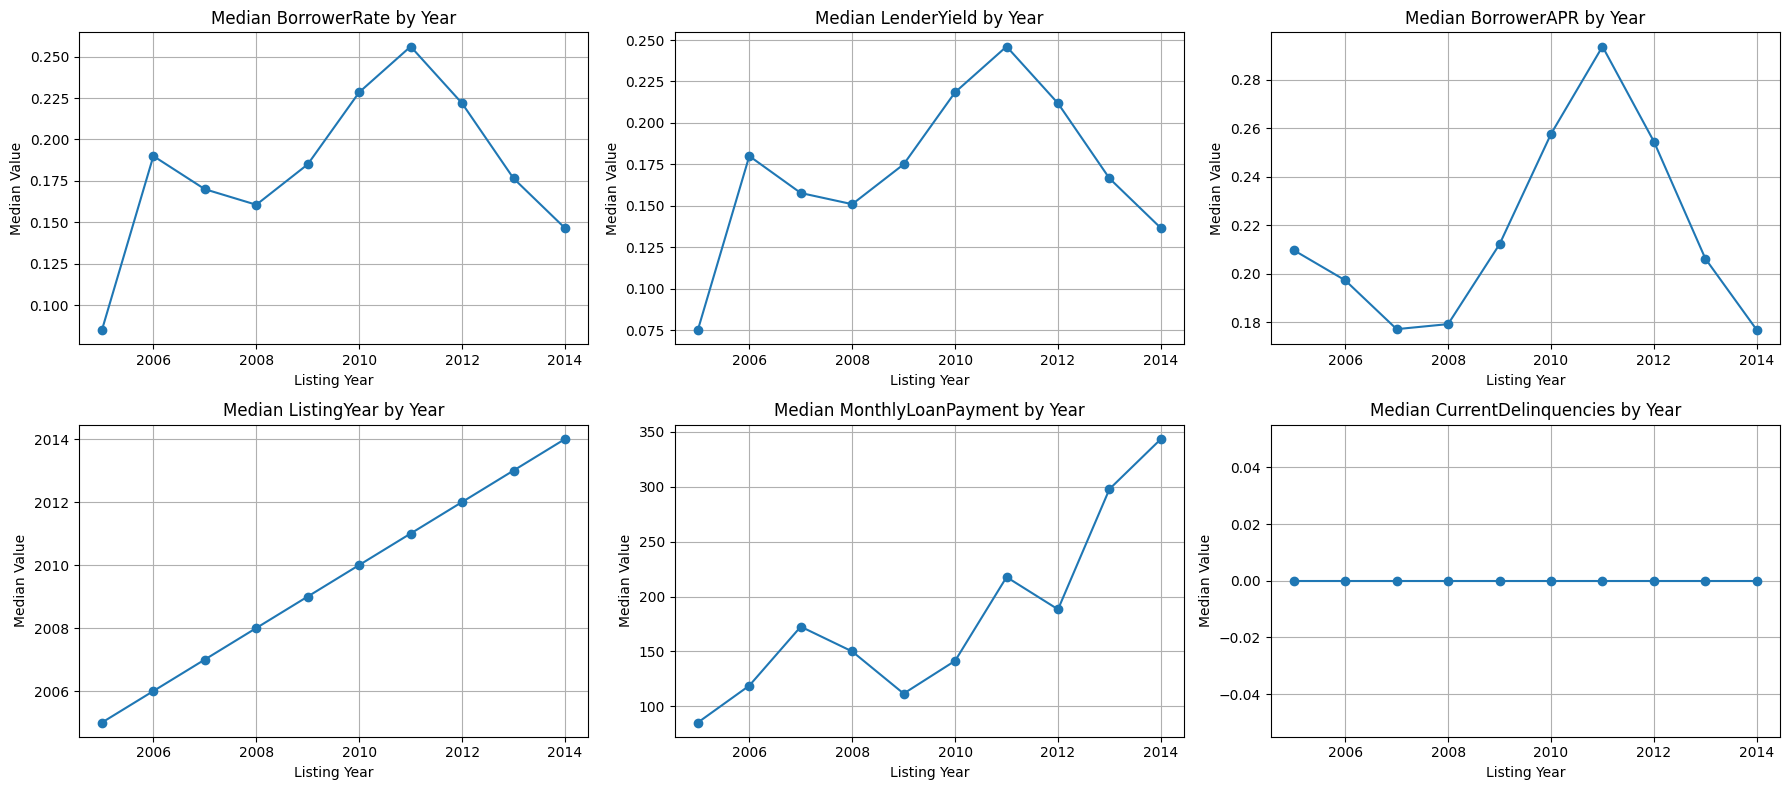

In [54]:
# Top 6 most important features from Lasso
top_lasso_features = lasso_coefs.abs().sort_values(ascending=False).head(6).index.tolist()

# Plot evolution of median value by year
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()

for i, feature in enumerate(top_lasso_features):
    df.groupby('ListingYear')[feature].median().plot(ax=axes[i], marker='o')
    axes[i].set_title(f'Median {feature} by Year')
    axes[i].set_xlabel('Listing Year')
    axes[i].set_ylabel('Median Value')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Feature Stability Over Time – Interpretation

We analyzed the median value of the top 6 Lasso-selected features by `ListingYear` to evaluate their temporal stability:

- **BorrowerRate, LenderYield, BorrowerAPR**:
  - Show parallel behavior with peaks around 2010–2011.
  - This pattern likely reflects changes in interest rate policy and credit risk over time.
  - Variation is expected and interpretable, not random.

- **MonthlyLoanPayment**:
  - Displays an increasing trend over time, especially after 2010.
  - Indicates potential drift in loan amounts or payment terms, which should be monitored.

- **ListingYear**:
  - As expected, follows a linear increase. Not a predictive feature but useful for drift analysis.

- **CurrentDelinquencies**:
  - Median is zero for all years, which suggests a highly skewed or binary distribution.
  - Should be reviewed for sparsity or transformed.

Overall, most selected features are reasonably stable or show structured temporal variation, supporting their inclusion in modeling.


In [56]:
df_scaled['CurrentDelinquencies'].value_counts().sort_index()

CurrentDelinquencies
-0.357676    90439
 0.314731    11716
 0.987137     4357
 1.659544     2098
 2.331951     1379
 3.004358      916
 3.676764      690
 4.349171      517
 5.021578      397
 5.693985     1428
Name: count, dtype: int64

## Temporal Default Rate Analysis

To detect potential temporal drift in default behavior, we analyze the evolution of the `TARGET` variable (default rate) by `ListingYear`.

This helps identify changes in risk over time that may affect model performance or generalization across different time periods.

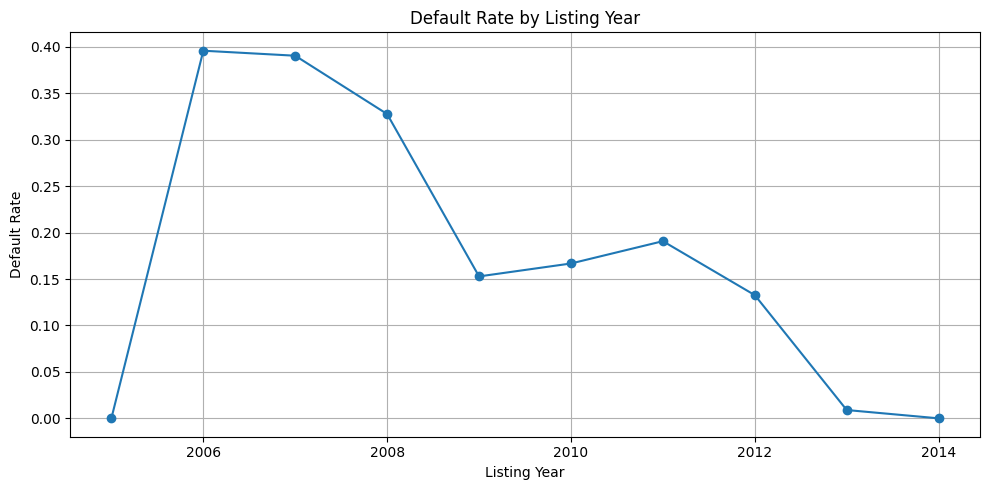

In [53]:
# Average default rate per year
yearly_default = df.groupby('ListingYear')['TARGET'].mean()

plt.figure(figsize=(10, 5))
yearly_default.plot(marker='o')
plt.title('Default Rate by Listing Year')
plt.xlabel('Listing Year')
plt.ylabel('Default Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

### Default Rate by Year – Interpretation

The target variable (`TARGET`) shows significant variation over time:

- Very high default rates in 2006–2008 (~40%)
- Gradual decline between 2009 and 2011
- Sharp drop after 2012, near 0% in 2014

This indicates clear **concept drift** in the problem definition over time, possibly due to changes in credit policy, macroeconomic factors, or applicant profiles.

Implications:
- Models trained on early years may not generalize to later years.
- Validation strategies should account for temporal structure.
- This justifies including temporal drift detection as part of the model audit process.


## Saving Final Preprocessed Datasets

To support both explainability and modeling, we save:

- **Unscaled dataset (full)**: for SHAP, LIME, and stakeholder-friendly reporting.
- **Scaled dataset with Lasso-selected features**: for model training and evaluation.

Other intermediate datasets are omitted to reduce redundancy and focus on the final modeling pipeline.


In [52]:
from sklearn.model_selection import train_test_split

# Create directory if it doesn't exist
save_path = '../data/processed/prosperloan/'
os.makedirs(save_path, exist_ok=True)

# ===== UN SCALED FULL DATASET =====
# Save full preprocessed dataset BEFORE scaling
pp.save_processed_data(df, f'{save_path}prosper_loan_data_preprocessed_unscaled.csv')

X_unscaled = df.drop('TARGET', axis=1)
y_unscaled = df['TARGET']

X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(
    X_unscaled, y_unscaled, test_size=0.2, random_state=42, stratify=y_unscaled
)

X_train_unscaled.to_csv(f'{save_path}X_train_unscaled.csv', index=False)
X_test_unscaled.to_csv(f'{save_path}X_test_unscaled.csv', index=False)
y_train_unscaled.to_csv(f'{save_path}y_train_unscaled.csv', index=False)
y_test_unscaled.to_csv(f'{save_path}y_test_unscaled.csv', index=False)

# ===== LASSO-SELECTED SCALED DATASET =====
X_lasso = df_scaled[selected_features]
y_scaled = df_scaled['TARGET']

X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(
    X_lasso, y_scaled, test_size=0.2, random_state=42, stratify=y_scaled
)

X_lasso.to_csv(f'{save_path}X_lasso.csv', index=False)
X_train_lasso.to_csv(f'{save_path}X_train_lasso.csv', index=False)
X_test_lasso.to_csv(f'{save_path}X_test_lasso.csv', index=False)
y_train_lasso.to_csv(f'{save_path}y_train_lasso.csv', index=False)
y_test_lasso.to_csv(f'{save_path}y_test_lasso.csv', index=False)

print("Final datasets saved: unscaled full data + Lasso-selected scaled features.")


Final datasets saved: unscaled full data + Lasso-selected scaled features.


The dataset has been fully cleaned, transformed, and prepared for modeling.  
Key steps completed include:

- Removal of post-loan and model-based leakage variables.
- Handling of missing values with appropriate imputation strategies.
- Treatment of outliers using capping.
- Encoding of categorical variables (ordinal, one-hot, and target encoding).
- Feature scaling for model compatibility.
- Feature selection using Lasso and Ridge.
- Temporal analysis of default rates and variable stability over time.

The final dataset is ready for model training, validation, and auditing.
